In [1]:
#Importing tensorflow and keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
ASLModel03 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(73, 73,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])
ASLModel03.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ASLModel03.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 71, 71, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          9

In [3]:
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                      shear_range = 0.2,
                                                                      zoom_range = 0.2,
                                                                      horizontal_flip = True,
                                                                      validation_split=0.2)

training_dataset = train_datagenerator.flow_from_directory('asl_alphabet_train/asl_alphabet_train',
                                                           target_size = (73, 73),  # the size of the images expected in my cnn model
                                                           batch_size = 32,
                                                           subset = 'training',
                                                           class_mode = 'categorical')

validation_dataset = train_datagenerator.flow_from_directory('asl_alphabet_train/asl_alphabet_train',
                                                             target_size = (73, 73),
                                                             batch_size = 32,
                                                             subset = 'validation',
                                                             class_mode = 'categorical')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [4]:
ASLVersion3=ASLModel03.fit(training_dataset,
              epochs = 39,
              validation_data = validation_dataset)
ASLModel03.save_weights('ASLTest03.h5')

Epoch 1/39
2175/2175 [==============================] - 959s 440ms/step - loss: 1.7011 - accuracy: 0.4704 - val_loss: 1.7732 - val_accuracy: 0.4683
Epoch 2/39
2175/2175 [==============================] - 958s 440ms/step - loss: 0.6755 - accuracy: 0.7689 - val_loss: 1.3854 - val_accuracy: 0.5960
Epoch 3/39
2175/2175 [==============================] - 942s 433ms/step - loss: 0.4434 - accuracy: 0.8448 - val_loss: 1.3080 - val_accuracy: 0.6437
Epoch 4/39
2175/2175 [==============================] - 943s 433ms/step - loss: 0.3292 - accuracy: 0.8849 - val_loss: 1.3953 - val_accuracy: 0.6411
Epoch 5/39
2175/2175 [==============================] - 890s 409ms/step - loss: 0.2644 - accuracy: 0.9083 - val_loss: 1.3423 - val_accuracy: 0.6757
Epoch 6/39
2175/2175 [==============================] - 920s 423ms/step - loss: 0.2311 - accuracy: 0.9203 - val_loss: 1.3544 - val_accuracy: 0.6724
Epoch 7/39
2175/2175 [==============================] - 745s 342ms/step - loss: 0.1959 - accuracy: 0.9331 - val_

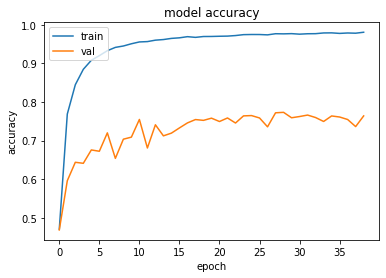

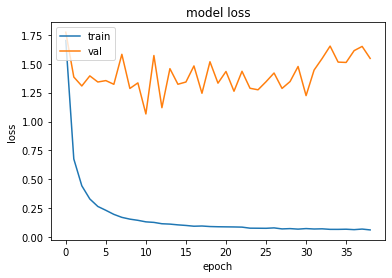

In [5]:
from matplotlib import pyplot as plt

plt.plot(ASLVersion3.history['accuracy'])
plt.plot(ASLVersion3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(ASLVersion3.history['loss'])
plt.plot(ASLVersion3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
# Load weights of a pretrained model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True)

test_set = test_datagen.flow_from_directory('asl_alphabet_test/asl_alphabet_test',
                                            target_size = (73, 73),
                                            batch_size = 32,
                                            class_mode = 'categorical')


ASLModel03.load_weights("ASLTest03.h5")

test_loss, test_acc = ASLModel03.evaluate(test_set)
print(test_acc)
print(test_loss)


Found 28 images belonging to 29 classes.
1/1 [==============================] - 0s 119ms/step - loss: 0.0105 - accuracy: 1.0000
1.0
0.010469486005604267
